# Maternal Risk Prediction Using Machine Learning

## Project Overview

This project aims to develop a robust and explainable machine learning model for predicting maternal health risk levels.

The objective is to classify patients into:
- **Low Risk**
- **High Risk**

The modeling pipeline includes:

- Exploratory Data Analysis (EDA)
- Data preprocessing
- Model training and evaluation
- Cross-validation
- Hyperparameter optimization
- Calibration analysis
- Statistical model comparison
- SHAP-based explainability

The final goal is to identify the most reliable and interpretable model for maternal risk prediction.

## Problem Definition

Maternal health risk assessment is a critical task in healthcare analytics. Early identification of high-risk pregnancies allows healthcare providers to intervene proactively.

This study frames the problem as a **binary classification task**, where:

- Target variable: `Risk Level`
- Class 0 → Low Risk
- Class 1 → High Risk

We aim to build a predictive model that is:

- Accurate
- Statistically validated
- Well-calibrated
- Clinically interpretable

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools will be imported later when needed

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [5]:
# Load the dataset

df = pd.read_csv("../data/maternal.csv")

# Display first 5 rows
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [ ]:
# Dataset shape
print("Dataset shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Data types
print("\nData types:")
print(df.dtypes)

# Basic statistics
print("\nStatistical Summary:")
df.describe()

Dataset shape: (1205, 12)

Columns:
Index(['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI',
       'Previous Complications', 'Preexisting Diabetes',
       'Gestational Diabetes', 'Mental Health', 'Heart Rate', 'Risk Level'],
      dtype='object')

Data types:
Age                         int64
Systolic BP               float64
Diastolic                 float64
BS                        float64
Body Temp                   int64
BMI                       float64
Previous Complications    float64
Preexisting Diabetes      float64
Gestational Diabetes        int64
Mental Health               int64
Heart Rate                float64
Risk Level                 object
dtype: object

Statistical Summary:


,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.482988,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,9.196765,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,31.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,65.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


## Dataset Description

The dataset contains **1205 observations** and **12 variables**, including 11 predictor variables and 1 target variable (`Risk Level`).

### Feature Categories

The dataset includes:

- Demographic variable:
  - Age

- Cardiovascular indicators:
  - Systolic BP
  - Diastolic
  - Heart Rate

- Metabolic indicators:
  - Blood Sugar (BS)
  - BMI
  - Body Temperature

- Medical history indicators:
  - Previous Complications
  - Preexisting Diabetes
  - Gestational Diabetes
  - Mental Health

The target variable (`Risk Level`) is categorical and will later be converted into binary numerical format.

Class Distribution:
Risk Level
Low     713
High    474
Name: count, dtype: int64


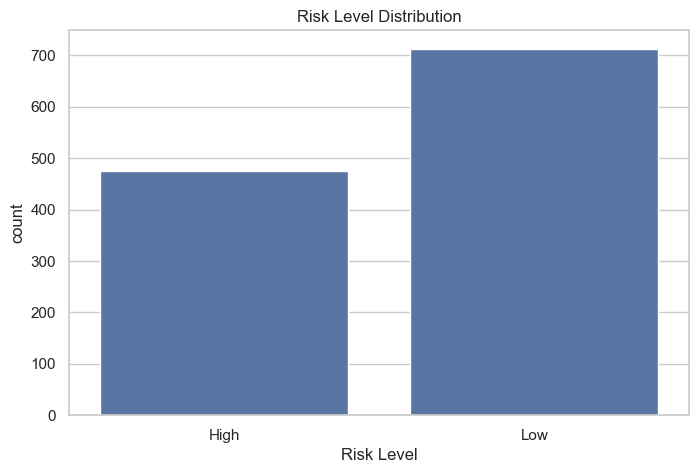

In [ ]:
# Check class distribution

risk_counts = df["Risk Level"].value_counts()

print("Class Distribution:")
print(risk_counts)

# Plot distribution
sns.countplot(data=df, x="Risk Level")
plt.title("Risk Level Distribution")
plt.show()

## Target Distribution Analysis

The dataset contains:

- 713 Low Risk cases
- 474 High Risk cases

This corresponds to approximately:

- 60% Low Risk
- 40% High Risk

The dataset exhibits a **mild class imbalance**, but not severe enough to require advanced rebalancing techniques (e.g., SMOTE or class weighting).

Standard evaluation metrics such as accuracy, ROC-AUC, and Precision-Recall remain appropriate for this analysis.

Numerical Features:
['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI', 'Previous Complications', 'Preexisting Diabetes', 'Gestational Diabetes', 'Mental Health', 'Heart Rate']


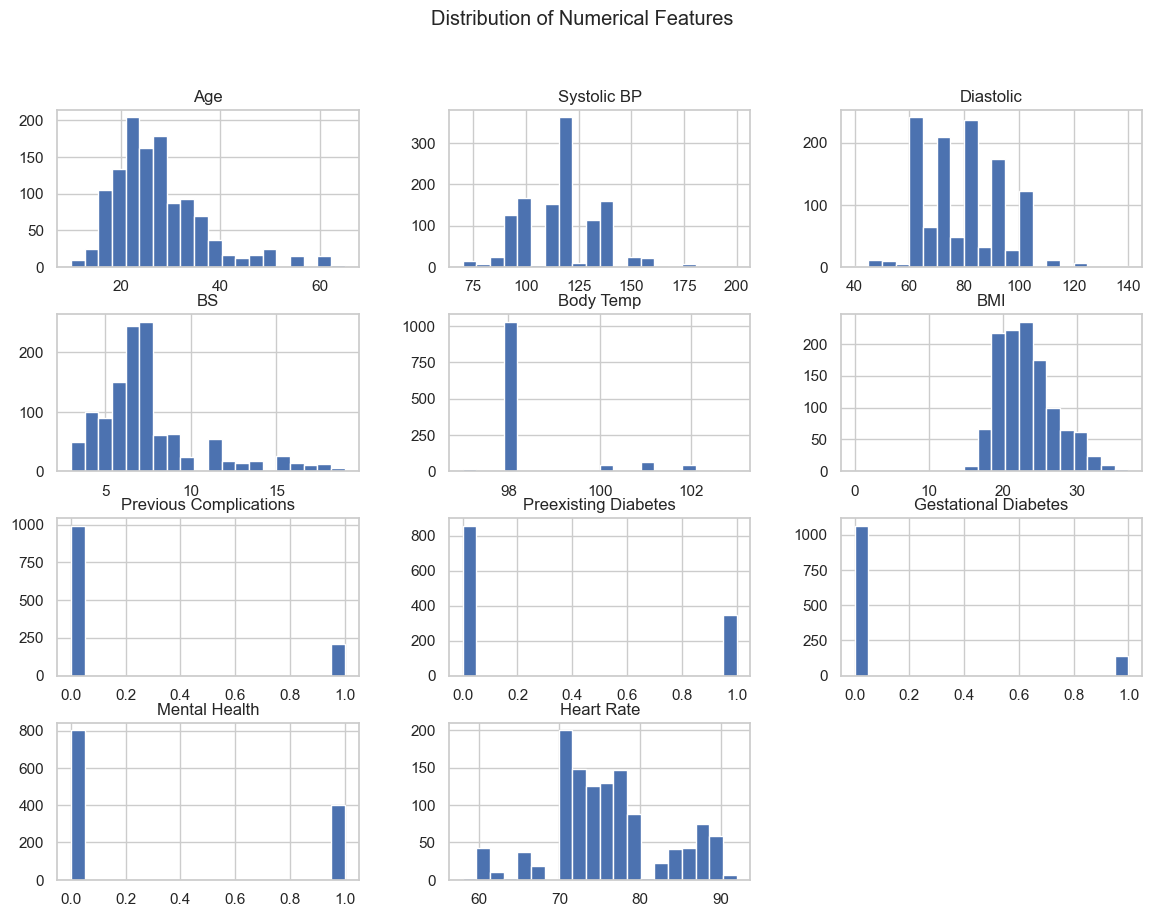

In [ ]:
# Separate numerical features (excluding target)

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numerical Features:")
print(numerical_features)

# Plot histograms
df[numerical_features].hist(bins=20, figsize=(14,10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

## Numerical Feature Distribution Analysis

The histogram analysis reveals the following patterns:

- **Age:** Most patients fall within the 20–35 age range, with a slight right skew.
- **Systolic and Diastolic Blood Pressure:** Values are generally within clinically reasonable ranges, with a few high outliers.
- **Blood Sugar (BS):** The majority of observations are within normal ranges, but some extreme high values are observed.
- **BMI:** Most patients fall between 18 and 30, with some cases indicating obesity.
- **Binary Medical Indicators:** Variables such as Previous Complications, Preexisting Diabetes, Gestational Diabetes, and Mental Health are binary (0/1) and appear correctly encoded.

Overall, the distributions are clinically plausible and do not indicate severe data corruption or unrealistic values.

In [ ]:
# Compare numerical features by Risk Level

grouped_means = df.groupby("Risk Level")[numerical_features].mean()

print("Mean values by Risk Level:")
grouped_means

Mean values by Risk Level:


,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
Risk Level,,,,,,,,,,,
High,29.729958,123.50211,83.027426,9.734271,98.681435,25.827837,0.431290,0.672304,0.295359,0.704641,80.139535
Low,26.036466,112.38787,73.329114,6.045119,98.207574,21.694051,0.008415,0.036466,0.000000,0.089762,72.992987


## Risk-Level Feature Comparison

A comparison of mean feature values between High Risk and Low Risk groups reveals substantial differences.

Notable findings:

- **Blood Sugar (BS)** is significantly higher in the High Risk group.
- **Preexisting Diabetes** is present in approximately 67% of High Risk cases but only 3% of Low Risk cases.
- **Previous Complications** show a dramatic difference between groups.
- **BMI** is noticeably higher in the High Risk group.
- **Systolic Blood Pressure** is elevated in High Risk patients.
- **Mental Health indicators** are strongly associated with High Risk cases.

These strong separations suggest that the dataset contains highly discriminative patterns, which explains the very high classification performance observed in Phase 2.

The features appear clinically meaningful and aligned with real-world medical expectations.

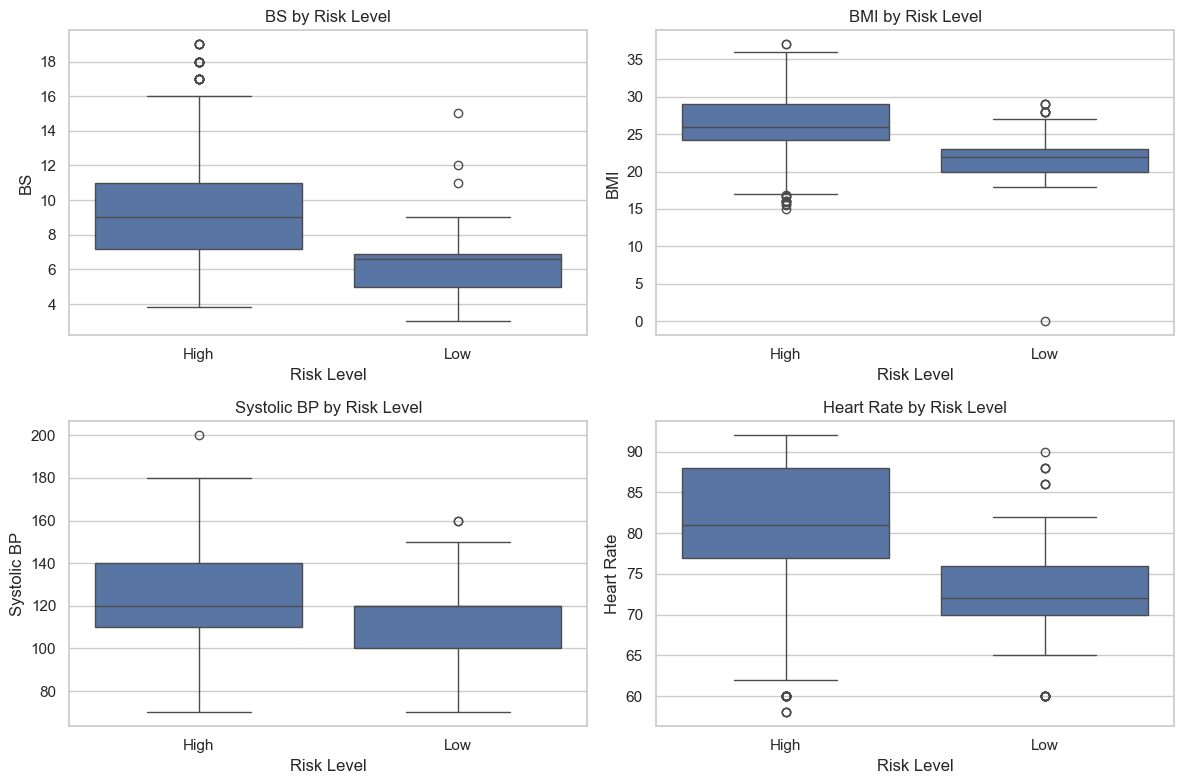

In [ ]:
# Select key discriminative features
key_features = ["BS", "BMI", "Systolic BP", "Heart Rate"]

plt.figure(figsize=(12,8))

for i, feature in enumerate(key_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x="Risk Level", y=feature)
    plt.title(f"{feature} by Risk Level")

plt.tight_layout()
plt.show()

## Boxplot-Based Feature Separation Analysis

Boxplots reveal clear separation patterns between High Risk and Low Risk groups:

- **Blood Sugar (BS)** shows the strongest separation, with minimal overlap.
- **BMI** demonstrates a consistent upward shift in the High Risk group.
- **Systolic Blood Pressure** is elevated among High Risk cases.
- **Heart Rate** shows moderate separation.

These visual findings confirm that several physiological indicators are strongly associated with maternal risk classification.

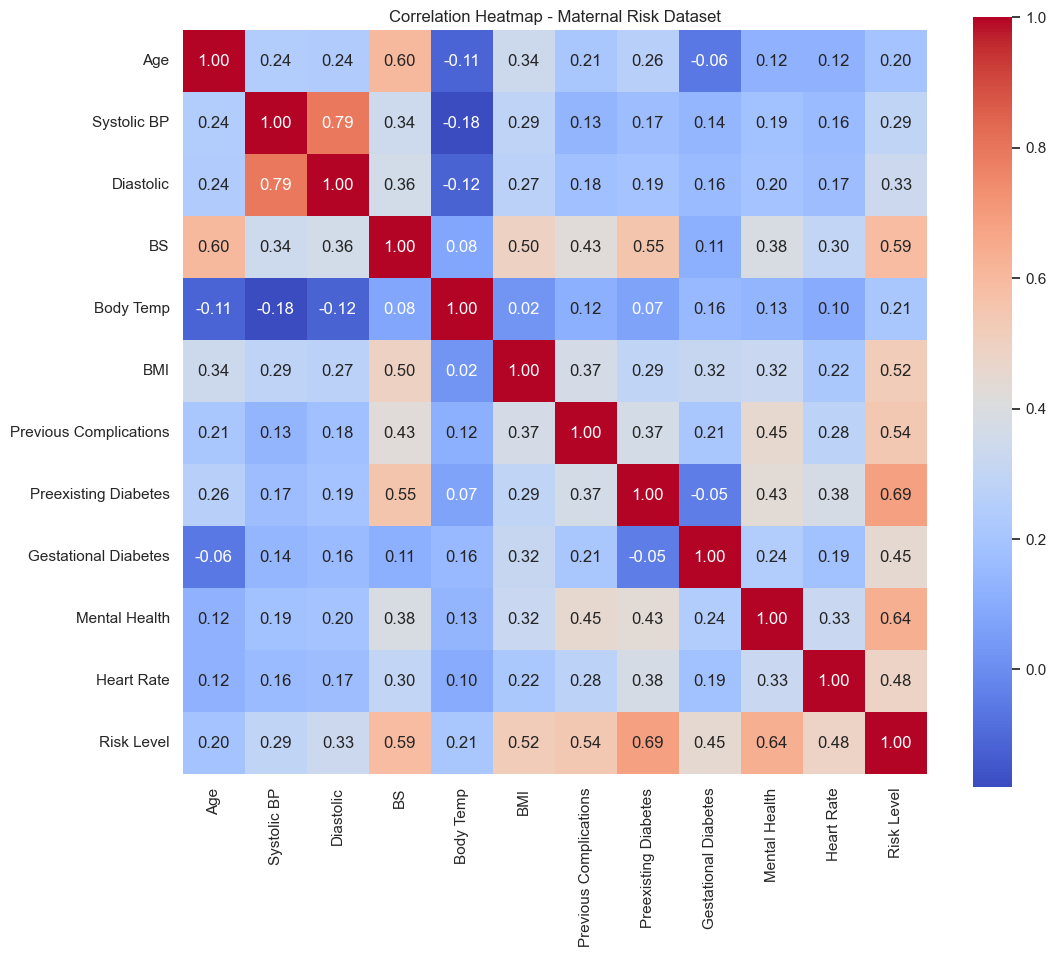

In [ ]:
# Encode target for correlation analysis
df_corr = df.copy()
df_corr["Risk Level"] = df_corr["Risk Level"].map({"Low": 0, "High": 1})

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - Maternal Risk Dataset")
plt.show()

## Correlation Analysis Interpretation

The correlation heatmap reveals strong linear associations between several features and the target variable (Risk Level).

Top correlations with Risk Level:

1. Preexisting Diabetes (0.69)
2. Mental Health (0.64)
3. Blood Sugar (0.59)
4. Previous Complications (0.54)
5. BMI (0.52)

These findings confirm that metabolic and preexisting health conditions are strong predictors of maternal risk.

Feature-to-feature correlation analysis shows moderate correlation between Systolic and Diastolic Blood Pressure (0.79), which is clinically expected. However, no extreme multicollinearity (≥ 0.8) is observed.

Overall, the dataset exhibits strong discriminative structure without problematic redundancy.

## Phase 2: Predictive Modeling

After exploratory analysis and correlation assessment, we proceed to build predictive machine learning models for maternal risk classification.

The modeling phase includes:

- Target encoding
- Train-test split
- Preprocessing pipeline
- Logistic Regression (baseline)
- Random Forest
- SHAP interpretability
- Hyperparameter tuning
- Model comparison

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# Load dataset
df = pd.read_csv("../data/maternal.csv")

print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
   Age  Systolic BP  Diastolic   BS  Body Temp   BMI  Previous Complications  \
0   22         90.0       60.0  9.0        100  18.0                     1.0   
1   22        110.0       70.0  7.1         98  20.4                     0.0   
2   27        110.0       70.0  7.5         98  23.0                     1.0   
3   20        100.0       70.0  7.2         98  21.2                     0.0   
4   20         90.0       60.0  7.5         98  19.7                     0.0   

   Preexisting Diabetes  Gestational Diabetes  Mental Health  Heart Rate  \
0                   1.0                     0              1        80.0   
1                   0.0                     0              0        74.0   
2                   0.0                     0              0        72.0   
3                   0.0                     0              0        74.0   
4                   0.0                     0              0        74.0   

  Risk Level  
0       High  
1  

## Target Encoding

The target variable **Risk Level** is categorical ("Low", "High").
We encode it into binary format:

- Low  → 0
- High → 1

This allows the use of binary classification algorithms.

In [8]:
# Encode target variable
df["Risk_Level"] = df["Risk Level"].map({"Low": 0, "High": 1})

print("Target distribution after encoding:")
print(df["Risk_Level"].value_counts())

Target distribution after encoding:
Risk_Level
0.0    713
1.0    474
Name: count, dtype: int64


### Handling Missing Target Values

Some records contain missing values in the target variable (Risk Level).
Since supervised learning requires labeled data, these rows are removed.

In [11]:
# Remove rows where target is missing
df = df.dropna(subset=["Risk Level"])

# Re-encode target
df["Risk_Level"] = df["Risk Level"].map({"Low": 0, "High": 1})

print("Updated target distribution:")
print(df["Risk_Level"].value_counts())

Updated target distribution:
Risk_Level
0    713
1    474
Name: count, dtype: int64


## Train–Test Split

The cleaned dataset is divided into training and testing sets.

- 80% → Training set
- 20% → Testing set
- Stratified sampling is applied to preserve class distribution.

In [12]:
from sklearn.model_selection import train_test_split

# Define feature matrix and target vector
X = df.drop(columns=["Risk Level", "Risk_Level"])
y = df["Risk_Level"]

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train shape: (949, 11)
Test shape: (238, 11)

Train class distribution:
Risk_Level
0    0.600632
1    0.399368
Name: proportion, dtype: float64

Test class distribution:
Risk_Level
0    0.60084
1    0.39916
Name: proportion, dtype: float64


## Baseline Model: Logistic Regression

We implement Logistic Regression as a baseline linear classifier.

Preprocessing:
- Feature scaling using StandardScaler

Evaluation metrics:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC
- Confusion Matrix

### Handling Missing Values

Logistic Regression does not support missing values.
Therefore, we apply median imputation before scaling.

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.98      0.99      0.98        95

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

Confusion Matrix:

[[141   2]
 [  1  94]]
ROC-AUC Score: 0.997938903202061


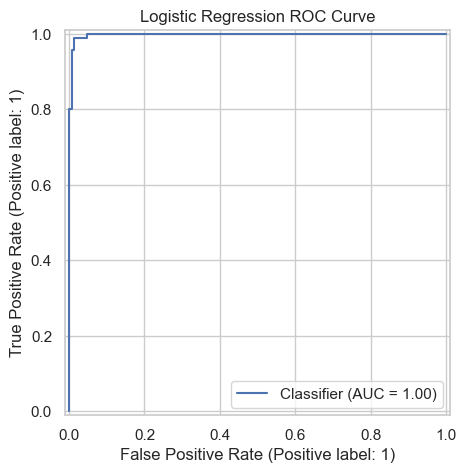

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

# Build pipeline with imputation
log_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Train model
log_model.fit(X_train, y_train)

# Predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("Logistic Regression ROC Curve")
plt.show()

## Random Forest Classifier

We implement a Random Forest model to capture potential nonlinear relationships.

Advantages:
- Handles nonlinear interactions
- Robust to multicollinearity
- Provides feature importance scores

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       143
           1       0.99      0.99      0.99        95

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238

Confusion Matrix:

[[142   1]
 [  1  94]]
ROC-AUC Score: 0.9995583364004418


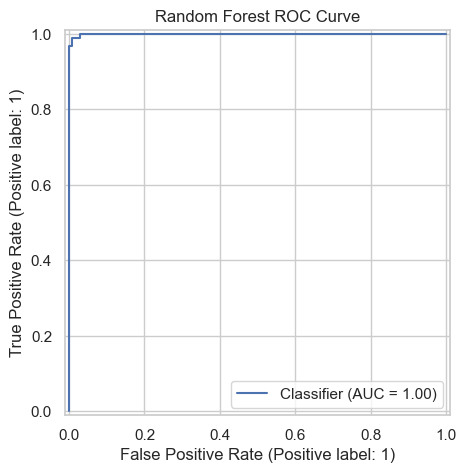

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Build Random Forest pipeline
rf_model = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42
    ))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Random Forest ROC Curve")
plt.show()

## Feature Importance (Random Forest)

Random Forest provides intrinsic feature importance scores
based on mean decrease in impurity.

This helps identify the most influential predictors of maternal risk.

                   Feature  Importance
7     Preexisting Diabetes    0.196891
5                      BMI    0.195389
3                       BS    0.184890
10              Heart Rate    0.137085
9            Mental Health    0.098857
8     Gestational Diabetes    0.081774
6   Previous Complications    0.036395
1              Systolic BP    0.022095
0                      Age    0.020663
2                Diastolic    0.018175
4                Body Temp    0.007785


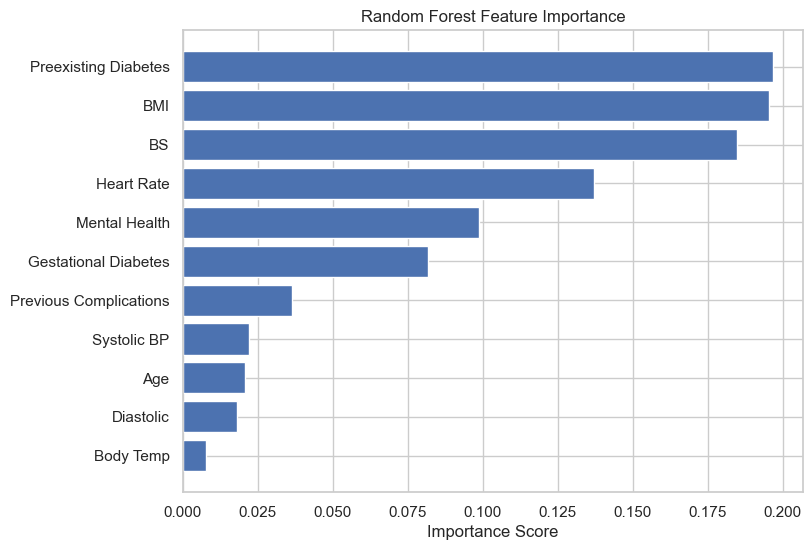

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract trained Random Forest model
rf_clf = rf_model.named_steps["classifier"]

# Get feature importances
importances = rf_clf.feature_importances_

# Create importance dataframe
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# Plot
plt.figure(figsize=(8,6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

## SHAP Interpretability (Random Forest)

SHAP (SHapley Additive exPlanations) is used to interpret
how each feature contributes to the prediction.

We compute SHAP values for the Random Forest model
to understand global feature impact.

In [ ]:
import shap
import numpy as np

# Transform training data (apply imputer only)
X_train_imputed = rf_model.named_steps["imputer"].transform(X_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model.named_steps["classifier"])

# Compute SHAP values
shap_values = explainer.shap_values(X_train_imputed)

print("SHAP values computed successfully.")

c:\Users\ASUS\AppData\Local\Programs\Python\Python314\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP values computed successfully.


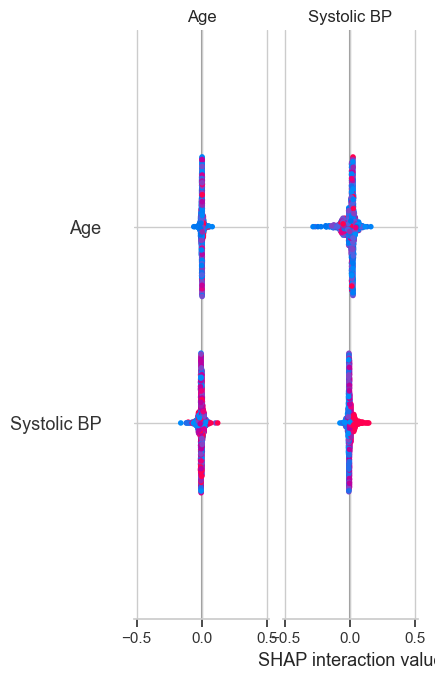

In [22]:
# If shap_values is a list (binary classification)
if isinstance(shap_values, list):
    shap_vals = shap_values[1]
else:
    shap_vals = shap_values

shap.summary_plot(
    shap_vals,
    X_train_imputed,
    feature_names=X.columns,
    plot_type="dot"
)